In [41]:
import zipfile
import pandas as pd

# Extract the dataset
with zipfile.ZipFile("archive (2).zip", "r") as zip_ref:
    zip_ref.extractall("titanic_data")

# Load the dataset
df = pd.read_csv("titanic_data/Titanic-Dataset.csv")

# Show the first few rows and missing values
print("📄 Original Dataset:")
print(df.head())

print("\n❓ Missing Values:")
print(df.isnull().sum())


📄 Original Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

In [43]:
# Drop columns that aren't helpful for prediction
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

print("\n🧹 After Dropping Unnecessary Columns:")
print(df.head())



🧹 After Dropping Unnecessary Columns:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [45]:
from sklearn.impute import SimpleImputer

# Fill missing age with median
df["Age"] = SimpleImputer(strategy="median").fit_transform(df[["Age"]])

# Fill missing 'Embarked' with most frequent
df["Embarked"] = SimpleImputer(strategy="most_frequent").fit_transform(df[["Embarked"]]).ravel()

print("\n🧼 After Handling Missing Values:")
print(df.isnull().sum())



🧼 After Handling Missing Values:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [47]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' and 'Embarked'
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])           # female=0, male=1
df["Embarked"] = le.fit_transform(df["Embarked"])

print("\n🔢 After Encoding Categorical Features:")
print(df.head())



🔢 After Encoding Categorical Features:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [49]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n📦 Data Split Complete:")
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))



📦 Data Split Complete:
Training samples: 712
Testing samples: 179


In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("\n✅ Model Trained Successfully!")



✅ Model Trained Successfully!


In [53]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 0.8212290502793296

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



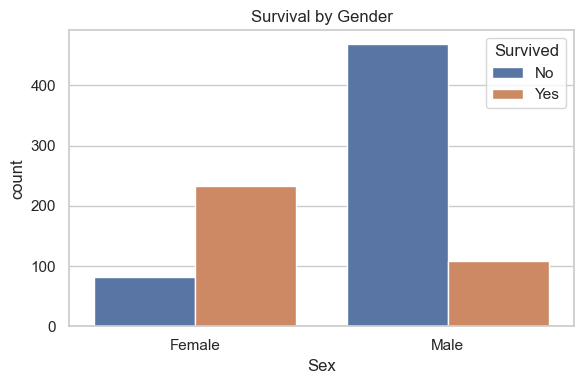

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Survival by gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


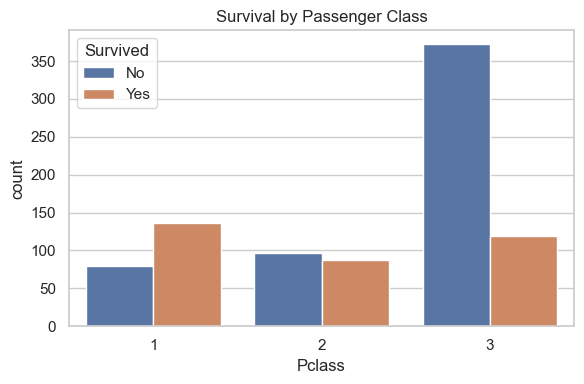

In [57]:
# Survival by class
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


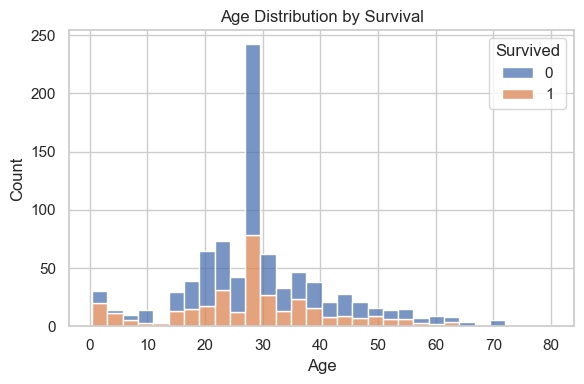

In [59]:
# Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30)
plt.title("Age Distribution by Survival")
plt.tight_layout()
plt.show()


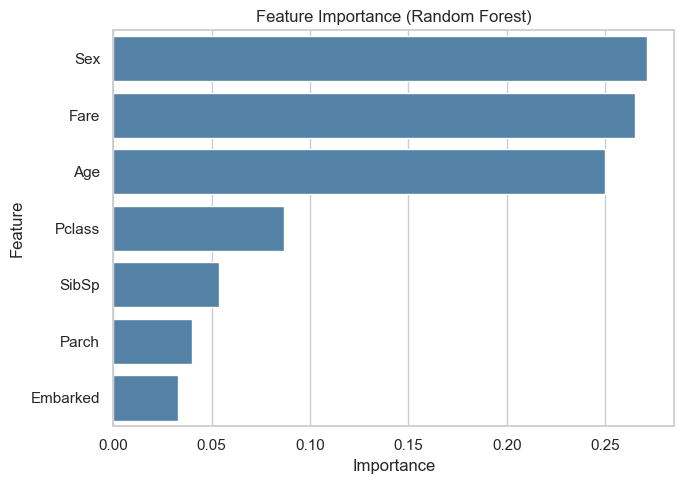

In [61]:
importances = model.feature_importances_
feature_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x="Importance", y="Feature", data=feature_df, color="steelblue")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()
